<a href="https://colab.research.google.com/github/BimsaraS99/multiclass-image-classification-torchvision-pytorch/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Image Classification model - PyTorch - without CNN***

TorchVision is a PyTorch library that consists of popular datasets, model architectures (such as ResNet, VGG, etc.), and common image transformations for computer vision tasks. It provides easy access to datasets like CIFAR-10, MNIST, and ImageNet, along with pre-trained models that can be used for transfer learning or as a starting point for custom models.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

## ***Import Libraries***

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms.v2 import ToTensor

import matplotlib.pyplot as plt
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


Torchvision supports common computer vision transformations in the `torchvision.transforms` and `torchvision.transforms.v2` modules. Transforms can be used to transform or augment data for training or inference of different tasks (image classification, detection, segmentation, video classification).

## ***Load the Datasets - FashionMNIST***

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # location to save the dataset
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


***train_data and test_data are objects of torchvision datasets***

In [ ]:
print(type(train_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


### ***Dataset Informations and display a sample image***

In [ ]:
print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}\n")

# Number of classes in the dataset
print(f"Number of classes: {len(train_data.classes)}\n")

# Class labels
print(f"Class labels: {train_data.classes}")

# Class distribution in the training dataset
class_distribution = {label: 0 for label in train_data.classes}
for _, label in train_data:
    class_distribution[train_data.classes[label]] += 1

print("\nClass distribution in training dataset:\n")
for label, count in class_distribution.items():
    print(f"{label}: {count}")

# Sample images and labels
sample_image, sample_label = train_data[121]
print("Sample image shape:", sample_image.shape, "\n")
print("Sample label:", sample_label)
print("Sample Image Type: ", type(sample_image))

Training data size: 60000
Test data size: 10000

Number of classes: 10

Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class distribution in training dataset:

T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000
Sample image shape: torch.Size([1, 28, 28]) 

Sample label: 5
Sample Image Type:  <class 'torch.Tensor'>


In [ ]:
print(train_data.targets)
print(train_data.class_to_idx)

tensor([9, 0, 0,  ..., 3, 0, 5])
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
sample_image # color values have been already map to 0 to 1 (usually 0 - 255)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Since there is only one color channel, all the image are back and white images.

In [ ]:
class_names =  train_data.classes

### ***Show example images***

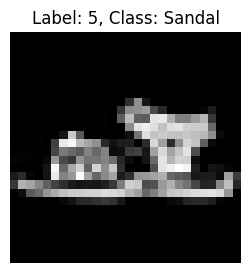

In [ ]:
sample_image_np = sample_image.squeeze().numpy()
plt.figure(figsize=(3, 3))
plt.imshow(sample_image_np, cmap='gray')
plt.axis('off')
plt.title(f"Label: {sample_label}, Class: {train_data.classes[sample_label]}")
plt.show()

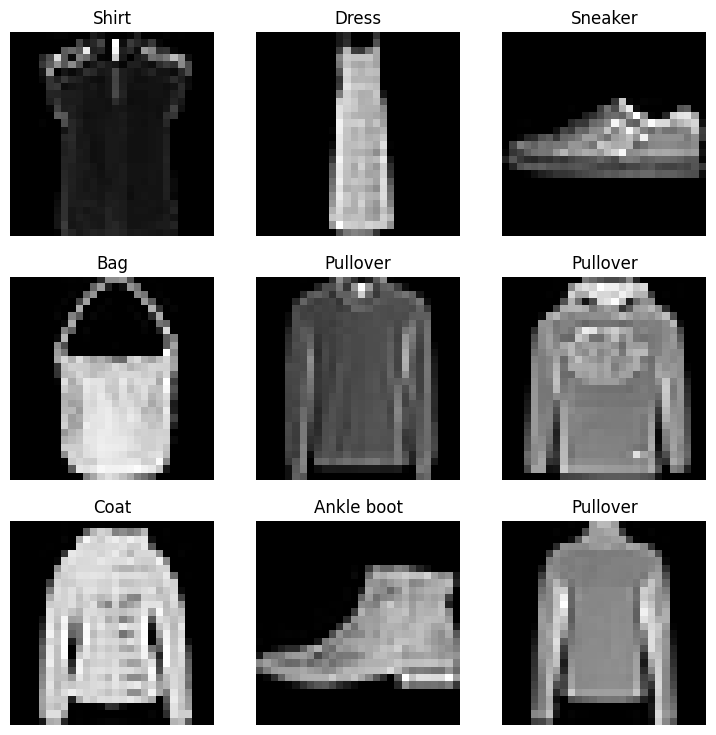

In [ ]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, 10):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## ***Prepare Data with `from torch.utils.data import DataLoader`***

***dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)***


A batch or mini-batch in the context of machine learning refers to a subset of the dataset that is used to compute the gradient of the loss function during training. Instead of using the entire dataset to compute the gradient, which can be computationally expensive and memory-intensive, the dataset is divided into smaller batches.

Stochastic Gradient Descent (SGD), Mini-batch Gradient Descent, and Batch Gradient Descent are variations of the gradient descent optimization algorithm, differing in how they update the model parameters using gradients computed from the training data. Here's a brief comparison:

1. **Batch Gradient Descent (BGD)**:
   - In BGD, the entire training dataset is used to compute the gradient of the loss function.
   - The model parameters are updated once per epoch (pass through the entire dataset).
   - BGD can be computationally expensive and memory-intensive, especially for large datasets, as it requires storing and processing the entire dataset at once.

2. **Stochastic Gradient Descent (SGD)**:
   - In SGD, the model parameters are updated after processing each individual training example.
   - SGD uses a single example (batch size of 1) to compute the gradient, making it computationally efficient and memory-friendly.
   - However, SGD can be more erratic in terms of convergence due to the high variance in the gradients computed from single examples, which can lead to noisy updates and slower convergence.

3. **Mini-batch Gradient Descent**:
   - Mini-batch Gradient Descent is a compromise between BGD and SGD, where the gradient is computed using a small subset (mini-batch) of the training dataset.
   - The mini-batch size is typically between 1 and a few hundred examples.
   - Mini-batch GD offers a balance between the efficiency of SGD and the stability of BGD. It provides a more stable convergence compared to SGD while being more computationally efficient than BGD.

In summary, BGD computes the gradient using the entire dataset, which can be slow and memory-intensive. SGD computes the gradient using a single example, which can lead to noisy updates. Mini-batch GD computes the gradient using a small subset of the dataset, offering a balance between efficiency and stability. The choice of which variant to use depends on factors such as the dataset size, computational resources, and the desired trade-off between efficiency and stability.

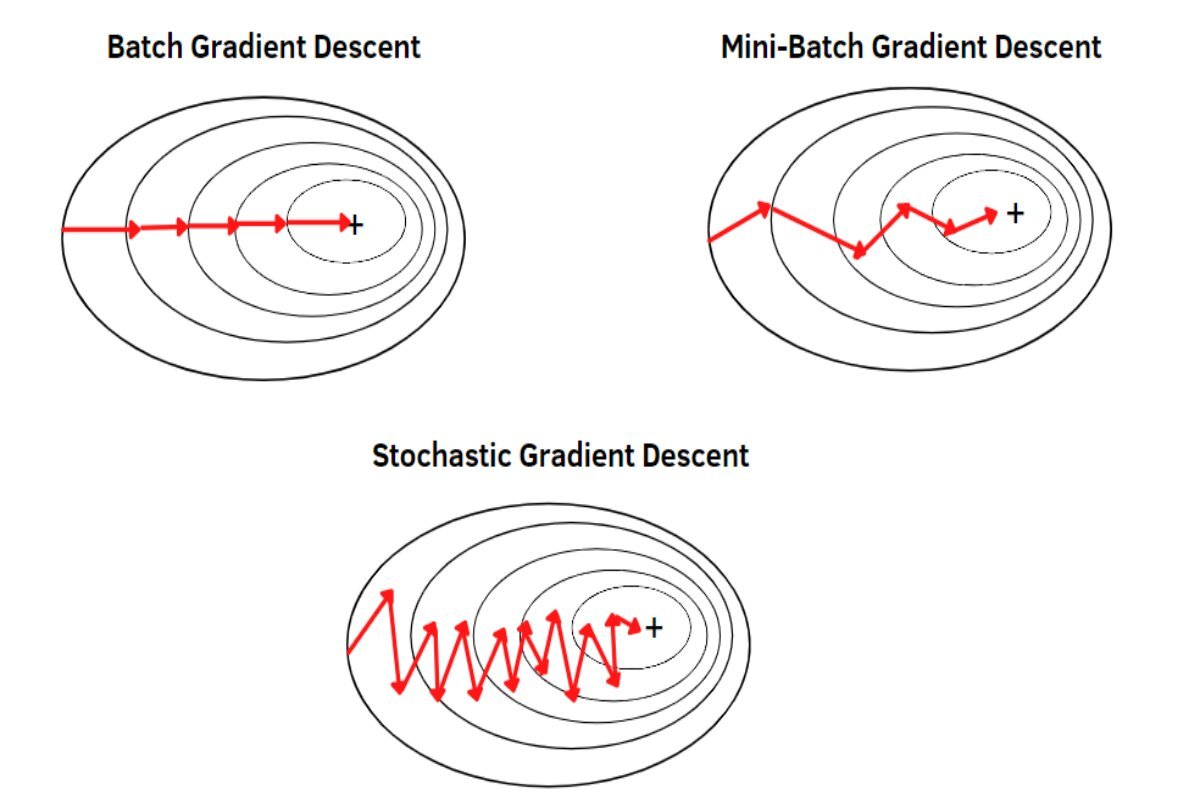

***Here we use - Mini batch gradient descent - Batch size is 32***

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    BATCH_SIZE,
    shuffle=True # shuffle the data at the beginning of each epoch (one pass through the entire dataset).
)

test_dataloader = DataLoader(
    test_data,
    BATCH_SIZE,
    shuffle=False
)

In [ ]:
print("Train data size: ", len(train_data))
print("Train data loader (6000 / 32 = 1875): ", len(train_dataloader), "\n")
print("Train data size: ", len(test_data))
print("Train data loader (10000 / 32 = 1875): ", len(test_dataloader), "\n")
print("Data type: ",  type(train_dataloader)) #object of torch.utils.data.dataloader

Train data size:  60000
Train data loader (6000 / 32 = 1875):  1875 

Train data size:  10000
Train data loader (10000 / 32 = 1875):  313 

Data type:  <class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

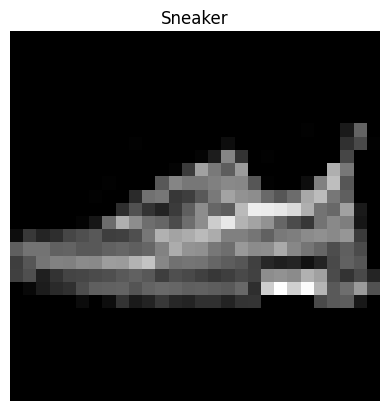

In [ ]:
random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
  print(batch, X.shape, y.shape)
  break

0 torch.Size([32, 1, 28, 28]) torch.Size([32])


## ***Building the model***

since this is a dataset with small images, we do not have to use CNN architecture to train the model. However, the flattern layer of the CNN is to used here to convert 1, 28, 28 images into 1, 784 dimension. But the Convolutional Layers and pooling layer wouldn't use.

***Small experiment with Flattern layer***

In [ ]:
flatten_layer = nn.Flatten()
print(img.shape, "\n")
flat_image = flatten_layer(img)
print(flat_image.shape)
# this 1, 784 dimension can be inputted to the fully connected nn and train the model

torch.Size([1, 28, 28]) 

torch.Size([1, 784])


***Build the model***

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class FashionModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layers(x)

In [ ]:
torch.manual_seed(42)
model = FashionModel(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

next(model.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

***Accuracy function***

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## ***Training loop***

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 30
train_losses, train_accuracies, test_losses, test_accuracies = [], [], [], []


for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(train_dataloader):

    X, y = X.to(device), y.to(device) # GPU or CPU
    y_pred = model(X) # forward propagation
    loss = loss_fn(y_pred, y) # loss calculations

    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # train accuracy

    optimizer.zero_grad() # reset the optimizer
    loss.backward() # backward propagation
    optimizer.step() # update parameters with SGD

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  train_losses.append(train_loss.item())
  train_accuracies.append(train_acc)

  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode(): # calculate the test accuracy
    for X, y in test_dataloader:

      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    test_losses.append(test_loss.item())
    test_accuracies.append(test_acc)

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.98193 | Test accuracy: 65.00%
Epoch: 1
-------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.86055 | Test accuracy: 73.91%
Epoch: 2
-------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 1.00554 | Test accuracy: 75.02%
Epoch: 3
-------
Train loss: 0.64384 | Train accuracy: 76.52%
Test loss: 0.82548 | Test accuracy: 76.13%
Epoch: 4
-------
Train loss: 0.62892 | Train accuracy: 77.00%
Test loss: 0.73134 | Test accuracy: 75.95%
Epoch: 5
-------
Train loss: 0.61576 | Train accuracy: 77.41%
Test loss: 0.51245 | Test accuracy: 76.50%
Epoch: 6
-------
Train loss: 0.60668 | Train accuracy: 77.78%
Test loss: 0.52007 | Test accuracy: 76.61%
Epoch: 7
-------
Train loss: 0.45148 | Train accuracy: 83.94%
Test loss: 0.24589 | Test accuracy: 84.39%
Epoch: 8
-------
Train loss: 0.39916 | Train accuracy: 85.95%
Test loss: 0.48782 | Test accuracy: 84.86%
Epoch: 9
-------
Train loss: 0.39335 | Train accuracy: 

***Loss and Accuracy graphs***

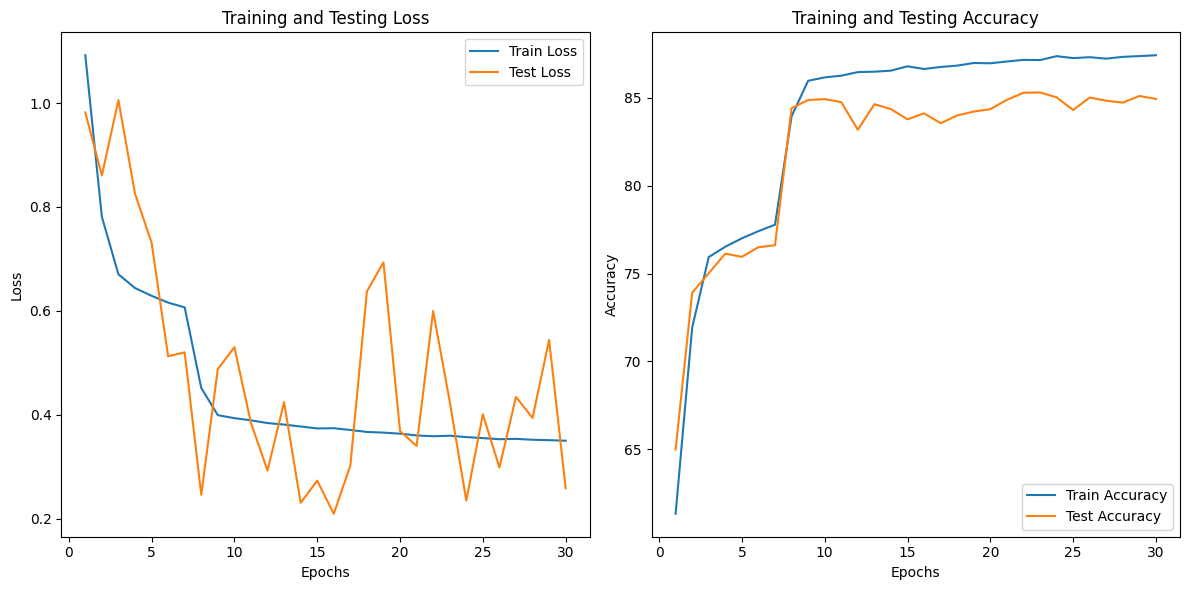

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## ***Do predications of Random Images***

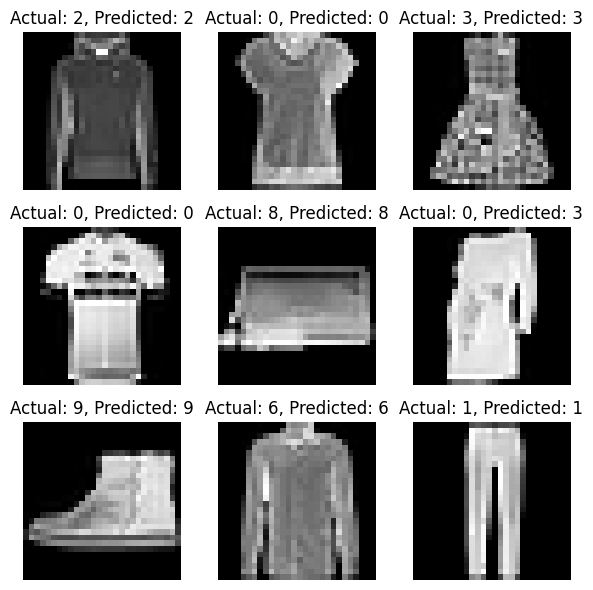

In [ ]:
import matplotlib.pyplot as plt
import random

# Set the model to evaluation mode
model.eval()

# Randomly select 9 images
random_indices = random.sample(range(len(test_data)), 9)

# Plot the images and their labels
plt.figure(figsize=(6, 6))
for i, idx in enumerate(random_indices):
    X, y = test_data[idx]
    X = X.unsqueeze(0)  # Add batch dimension
    with torch.inference_mode():
        y_pred = model(X)
    predicted_label = torch.argmax(y_pred, dim=1).item()

    plt.subplot(3, 3, i+1)
    plt.imshow(X.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Actual: {y}, Predicted: {predicted_label}")

plt.tight_layout()
plt.show()

